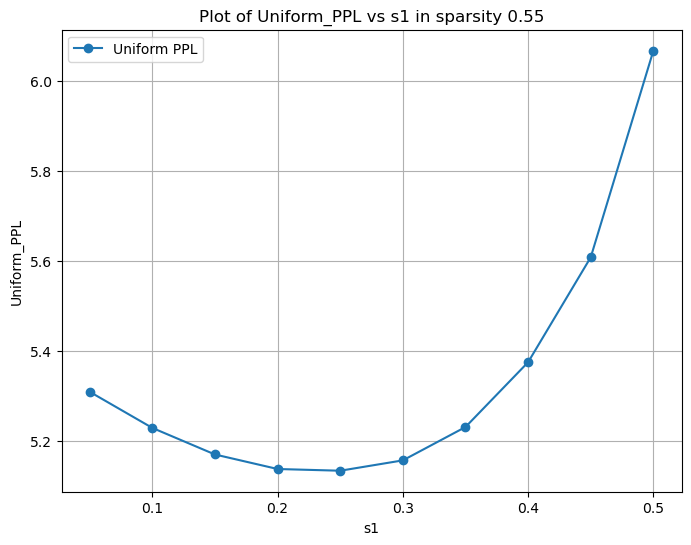

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
s=0.55
file_path = f"/root/TEAL/results/uniform_ppl_results_{s}.csv"
# file_path = f"/root/TEAL/results/wanda_ppl_results.csv"
# 데이터 불러오기
df = pd.read_csv(file_path)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(df['s1'], df['Uniform_PPL'], marker='o', linestyle='-', label="Uniform PPL")

# 축 라벨 및 제목 설정
plt.xlabel("s1")
plt.ylabel("Uniform_PPL")
plt.title(f"Plot of Uniform_PPL vs s1 in sparsity {s}")

# 격자 추가
plt.grid(True)

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()


# With saving

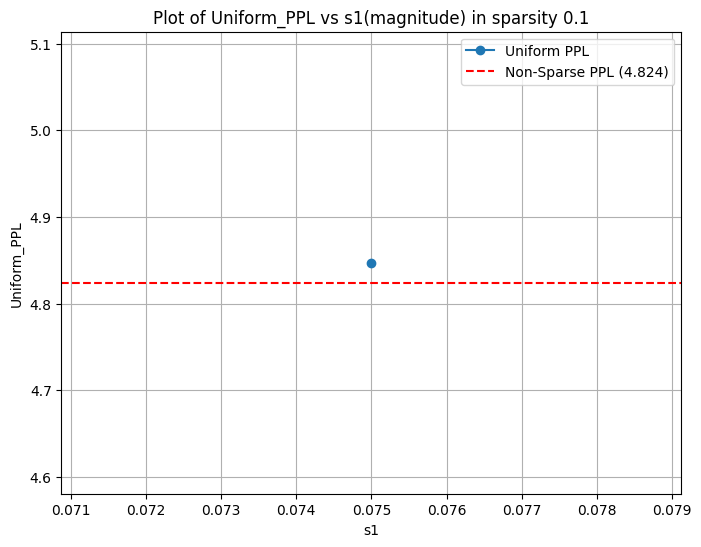

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.1.png


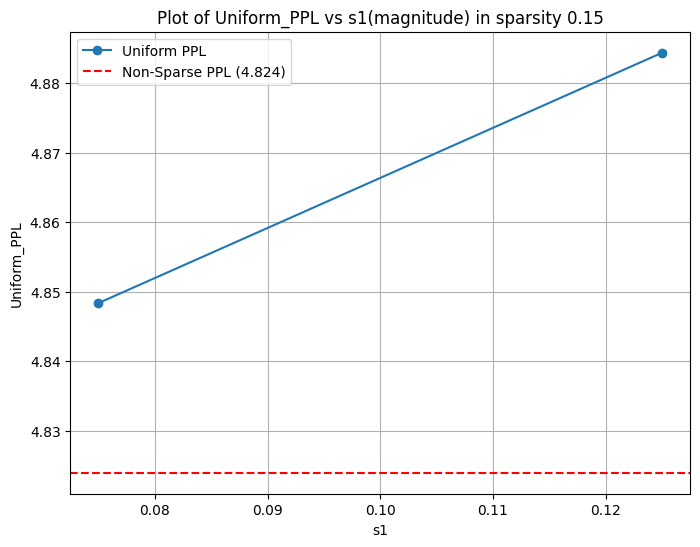

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.15.png


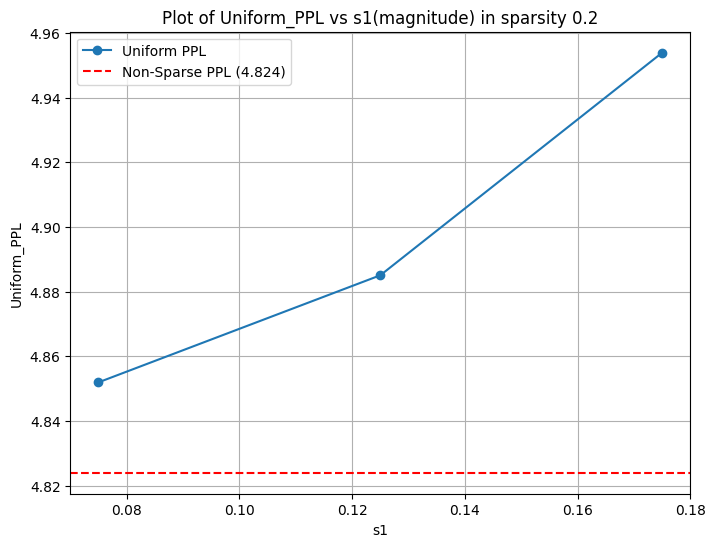

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.2.png


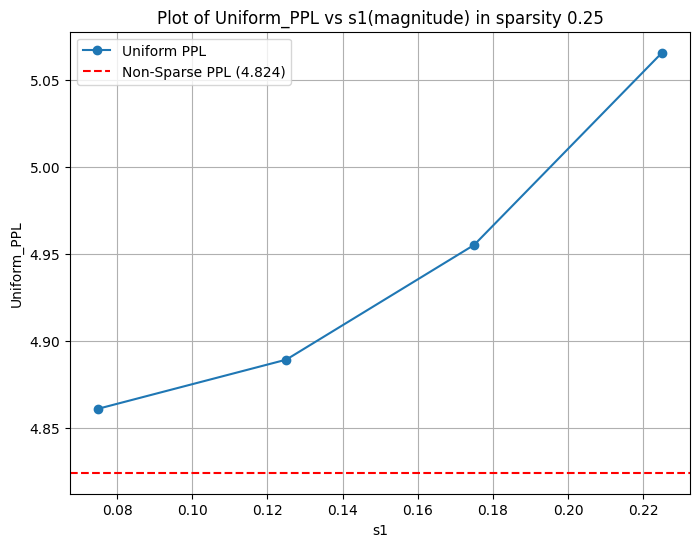

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.25.png


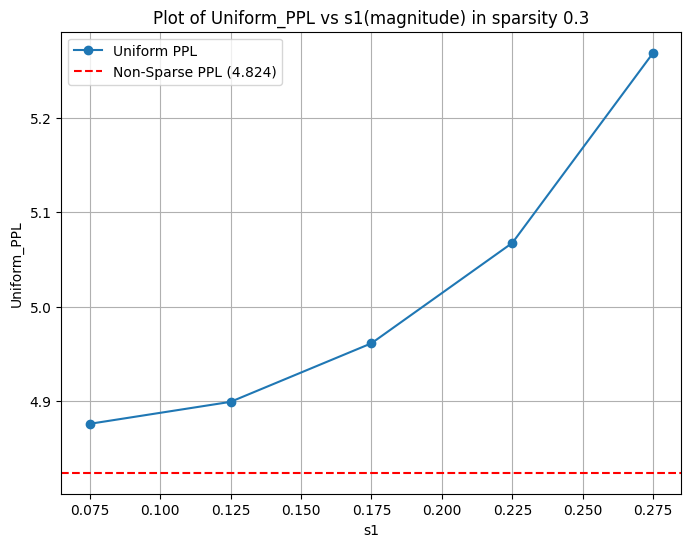

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.3.png


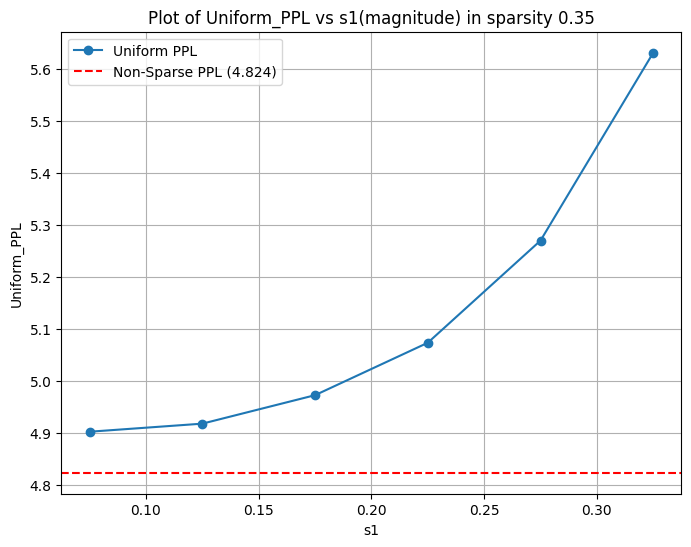

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.35.png


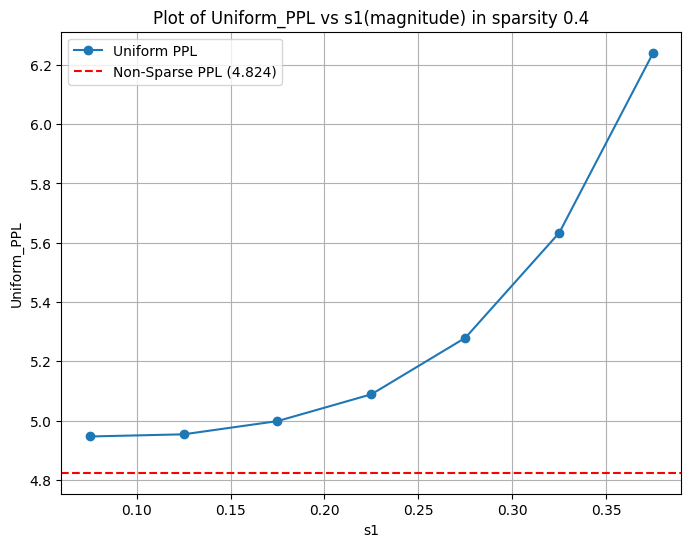

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.4.png


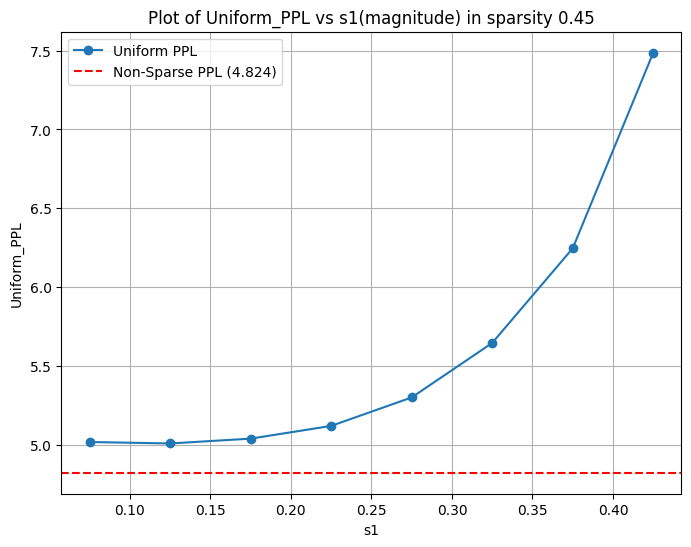

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.45.png


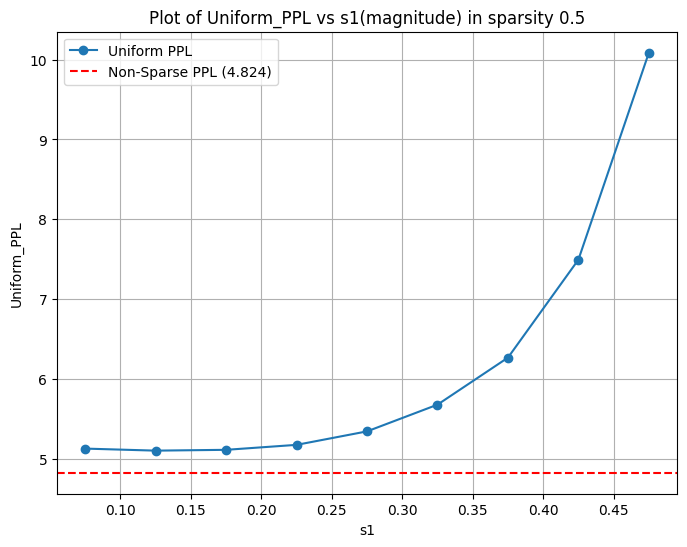

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.5.png


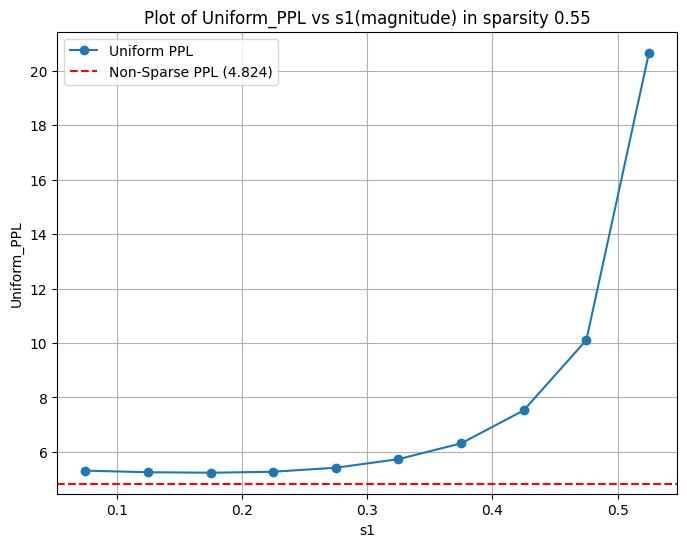

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.55.png


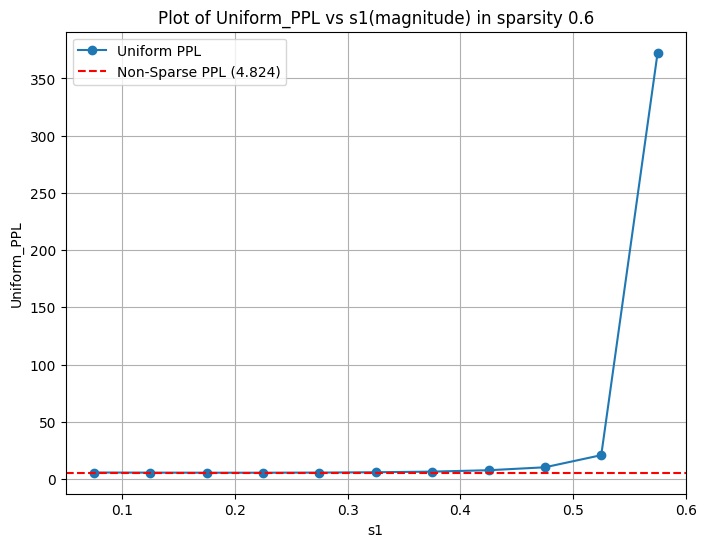

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.6.png


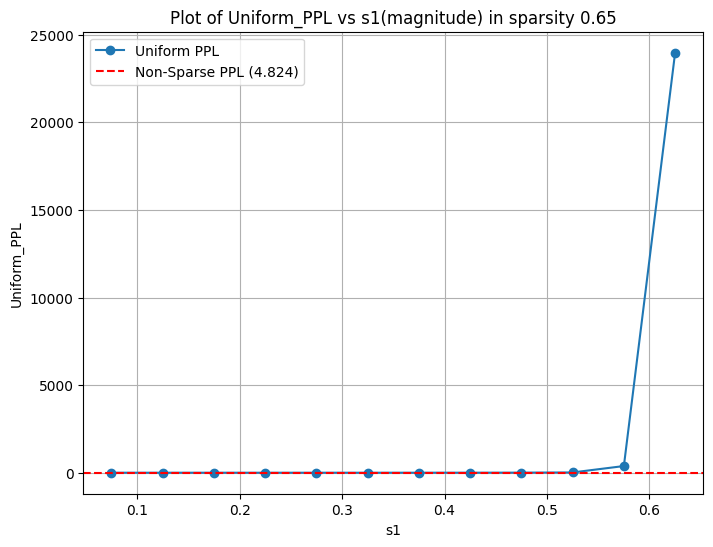

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.65.png


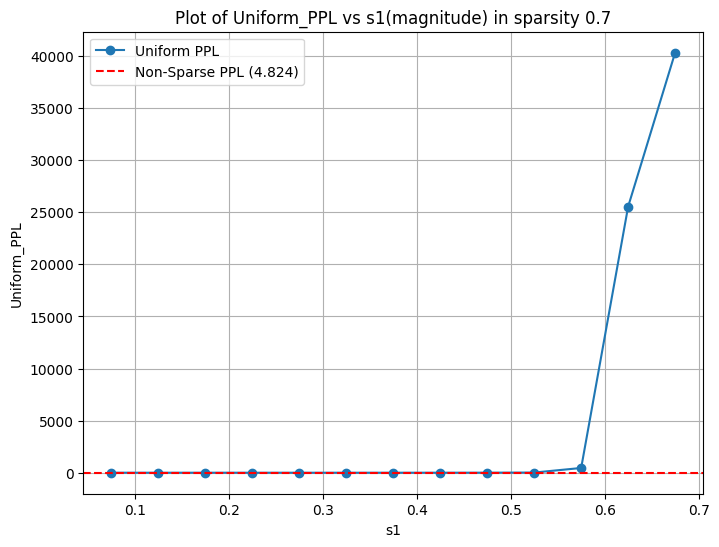

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.7.png


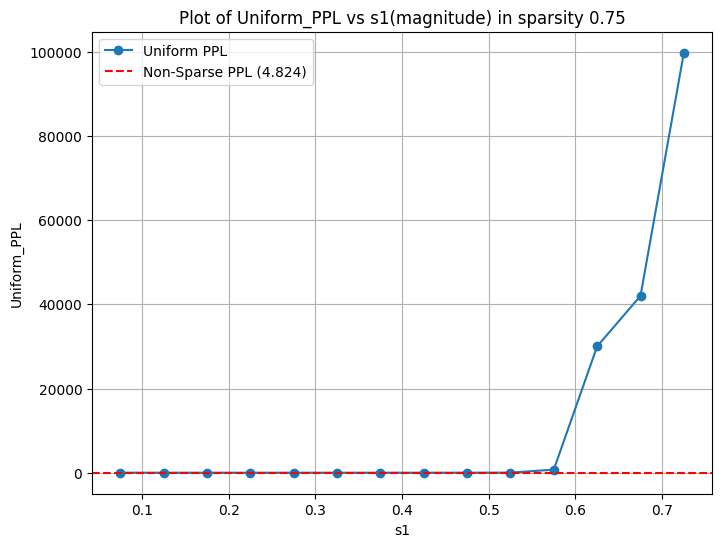

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.75.png


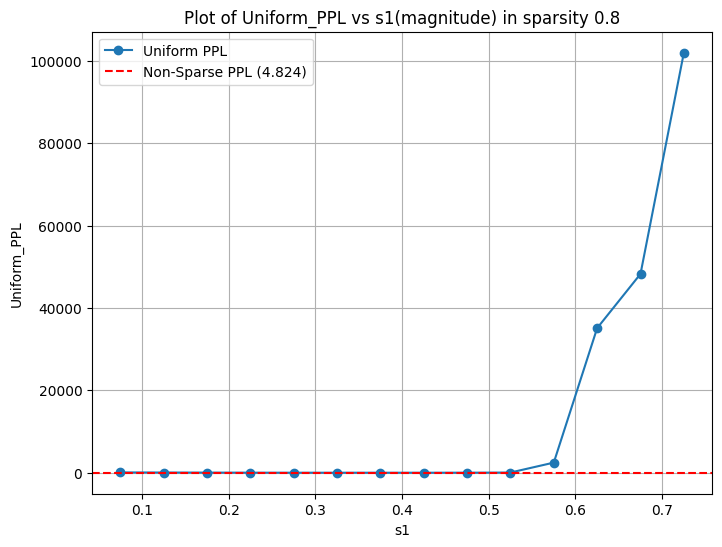

Plot saved at: /root/TEAL/results/uniform_ppl_plot_magnitude_0.8.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

method = "magnitude"
# 파일 경로
for s in range(10, 81, 5):
    s = s / 100.0
    file_path = f"/root/TEAL/results/uniform_ppl_results_{method}_{s}.csv"

    # 데이터 불러오기
    df = pd.read_csv(file_path)

    # 그래프 그리기
    plt.figure(figsize=(8, 6))
    plt.plot(df['s1'], df['Uniform_PPL'], marker='o', linestyle='-', label="Uniform PPL")

    # sparsity가 적용되지 않은 PPL 값 (4.824) 추가 (점선)
    plt.axhline(y=4.824, color='r', linestyle='--', label="Non-Sparse PPL (4.824)")

    # 축 라벨 및 제목 설정
    plt.xlabel("s1")
    plt.ylabel("Uniform_PPL")
    plt.title(f"Plot of Uniform_PPL vs s1({method}) in sparsity {s}")

    # 격자 추가
    plt.grid(True)

    # 범례 추가
    plt.legend()

    # 그래프 저장
    save_path = f"/root/TEAL/results/uniform_ppl_plot_{method}_{s}.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # 그래프 출력
    plt.show()

    print(f"Plot saved at: {save_path}")


# Multiple plot

import pandas as pd
import matplotlib.pyplot as plt
import glob

# 파일 경로 패턴 (s 값을 여러 개 처리 가능)
file_pattern = "/root/TEAL/results/uniform_ppl_results_*.csv"

# 파일 목록 가져오기
file_paths = glob.glob(file_pattern)

# 그래프 그리기
plt.figure(figsize=(8, 6))

for file_path in file_paths:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 파일명에서 s 값 추출 (파일명에서 숫자 부분만 가져오기)
    s_value = file_path.split('_')[-1].split('.csv')[0]
    
    # 데이터 플로팅
    plt.plot(df['s1'], df['Uniform_PPL'], marker='o', linestyle='-', label=f"s={s_value}")

# 축 라벨 및 제목 설정
plt.xlabel("s1")
plt.ylabel("Uniform_PPL")
plt.title("Plot of Uniform_PPL vs s1 for multiple sparsities")

# 격자 추가
plt.grid(True)

# 범례 추가
plt.legend()

# 그래프 저장
save_path = "/root/TEAL/results/uniform_ppl_multi_plot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# 그래프 출력
plt.show()

print(f"Plot saved at: {save_path}")


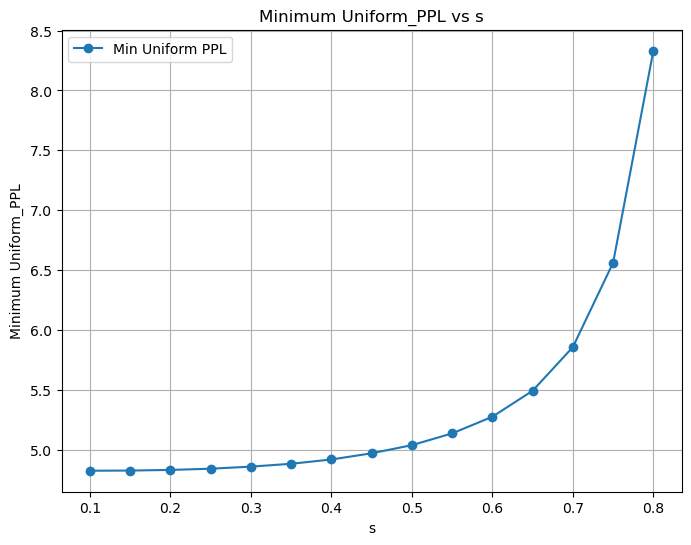

Plot saved at: /root/TEAL/results/uniform_ppl_min_plot.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 파일 경로 패턴 (s 값을 여러 개 처리 가능)
method = 
file_pattern = f"/root/TEAL/results/uniform_ppl_results_{method}_*.csv"

# 파일 목록 가져오기
file_paths = glob.glob(file_pattern)

# s 값과 최소 PPL을 저장할 리스트
s_values = []
min_ppl_values = []

# 각 파일을 순회하며 최소 PPL 추출
for file_path in file_paths:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 파일명에서 s 값 추출 (파일명에서 숫자 부분만 가져오기)
    s_value = float(file_path.split('_')[-1].split('.csv')[0])
    if s_value == 0.95:
        continue
    # 최소 PPL 값 찾기
    min_ppl = df['Uniform_PPL'].min()
    
    # 리스트에 저장
    s_values.append(s_value)
    min_ppl_values.append(min_ppl)

# s 값 기준으로 정렬
sorted_indices = sorted(range(len(s_values)), key=lambda i: s_values[i])
s_values = [s_values[i] for i in sorted_indices]
min_ppl_values = [min_ppl_values[i] for i in sorted_indices]

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(s_values, min_ppl_values, marker='o', linestyle='-', label="Min Uniform PPL")

# 축 라벨 및 제목 설정
plt.xlabel("s")
plt.ylabel("Minimum Uniform_PPL")
plt.title("Minimum Uniform_PPL vs s")

# 격자 추가
plt.grid(True)

# 범례 추가
plt.legend()

# 그래프 저장
save_path = "/root/TEAL/results/uniform_ppl_min_plot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# 그래프 출력
plt.show()

print(f"Plot saved at: {save_path}")


In [10]:
import pandas as pd
import glob

# 파일 경로 패턴 (s 값을 여러 개 처리 가능)
file_pattern = "/root/TEAL/results/uniform_ppl_results_*.csv"

# 파일 목록 가져오기
file_paths = glob.glob(file_pattern)

# 결과 저장 리스트
results = []

# 각 파일을 순회하며 최소 PPL과 해당 s1 값을 찾기
for file_path in file_paths:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 파일명에서 s 값 추출 (파일명에서 숫자 부분만 가져오기)
    s_value = float(file_path.split('_')[-1].split('.csv')[0])

    # s=0.95 제외
    if s_value == 0.95:
        continue
    
    # 최소 PPL 값 찾기
    min_ppl = df['Uniform_PPL'].min()

    # 최소 PPL이 발생한 s1 값 찾기
    min_s1 = df.loc[df['Uniform_PPL'].idxmin(), 's1']
    
    # 리스트에 저장
    results.append([s_value, min_s1, min_ppl])

# 결과를 DataFrame으로 변환
result_df = pd.DataFrame(results, columns=['s', 's1', 'Uniform_PPL'])

# s 값 기준으로 정렬
result_df = result_df.sort_values(by='s')

# CSV 파일로 저장
save_csv_path = "/root/TEAL/results/uniform_ppl_min_results.csv"
result_df.to_csv(save_csv_path, index=False)

print(f"CSV file saved at: {save_csv_path}")


CSV file saved at: /root/TEAL/results/uniform_ppl_min_results.csv


In [ ]:
import pandas as pd

# 파일 경로
min_ppl_file = "/root/TEAL/results/uniform_ppl_min_results.csv"
wanda_ppl_file = "/root/TEAL/results/wanda_ppl_results.csv"
teal_ppl_file = "/root/TEAL/results/teal_ppl_results.csv"

# 데이터 불러오기
min_ppl_df = pd.read_csv(min_ppl_file)  # ['s', 's1', 'Uniform_PPL']
wanda_df = pd.read_csv(wanda_ppl_file)  # ['s', 'Uniform_PPL']
teal_df = pd.read_csv(teal_ppl_file)    # ['s', 'Uniform_PPL']

# 컬럼명 변경
wanda_df.rename(columns={'Uniform_PPL': 'Wanda_Uniform_PPL'}, inplace=True)
teal_df.rename(columns={'Uniform_PPL': 'TEAL_Uniform_PPL'}, inplace=True)
min_ppl_df.rename(columns={'Uniform_PPL': 'Combined_Uniform_PPL'}, inplace=True)

# Wanda 및 TEAL 데이터와 병합 (on='s')
merged_df = min_ppl_df.merge(wanda_df, on='s', how='left').merge(teal_df, on='s', how='left')

# 정렬
merged_df = merged_df.sort_values(by='s')

# 저장 경로
save_csv_path = "/root/TEAL/results/combined_ppl_results.csv"

# CSV 저장
merged_df.to_csv(save_csv_path, index=False)

print(f"CSV file saved at: {save_csv_path}")


CSV file saved at: /root/TEAL/results/combined_ppl_results_excluding_0.95.csv


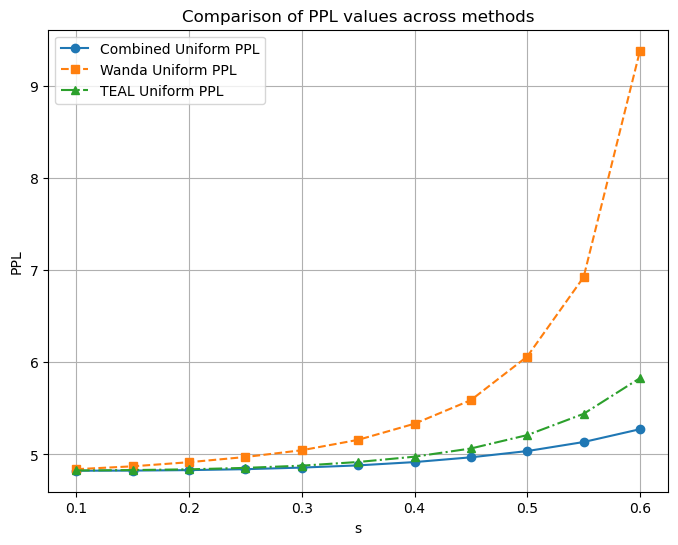

Plot saved at: /root/TEAL/results/combined_ppl_plot.png


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_path = "/root/TEAL/results/combined_ppl_results.csv"

# 데이터 불러오기
df = pd.read_csv(csv_path)
df = df[df['s'] <= 0.6]
# 그래프 그리기
plt.figure(figsize=(8, 6))

plt.plot(df['s'], df['Combined_Uniform_PPL'], marker='o', linestyle='-', label="Combined Uniform PPL")
plt.plot(df['s'], df['Wanda_Uniform_PPL'], marker='s', linestyle='--', label="Wanda Uniform PPL")
plt.plot(df['s'], df['TEAL_Uniform_PPL'], marker='^', linestyle='-.', label="TEAL Uniform PPL")

# 축 라벨 및 제목 설정
plt.xlabel("s")
plt.ylabel("PPL")
plt.title("Comparison of PPL values across methods")

# 격자 추가
plt.grid(True)

# 범례 추가
plt.legend()

# 그래프 저장
save_path = "/root/TEAL/results/combined_ppl_plot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# 그래프 출력
plt.show()

print(f"Plot saved at: {save_path}")
